## Understand the Data

We'll work with the FyntraCustomerData.csv. It has Customer info, such as Email, Address. Then it also has numerical value columns:

* Avg_Session_Length: Average session of in-store style advice sessions.
* Time_on_App: Average time spent on App in minutes
* Time_on_Website: Average time spent on Website in minutes
* Length_of_Membership: How many years the customer has been a member. 
* Yearly_Amount_Spent: The output parameter -- Amount Spend in thousand $ in a year 

In [6]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
%matplotlib inline

In [7]:
# read dataset and print first few lines
df = pd.read_csv('Datasets/FyntraCustomerData.csv')
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Exploratory Data Analysis

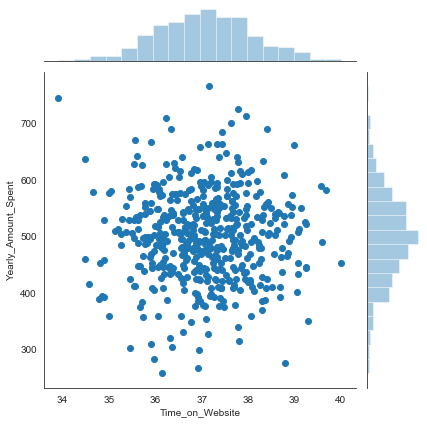

In [10]:
# jointplot between time spent on website and yearly amount spent
sns.set_style('white')
sns.jointplot('Time_on_Website', 'Yearly_Amount_Spent', data=df);

**NOTE:** There is little or no correlation between 'Time spent on website' and 'Yearly Amount Spent' as data is scattered all over the place.

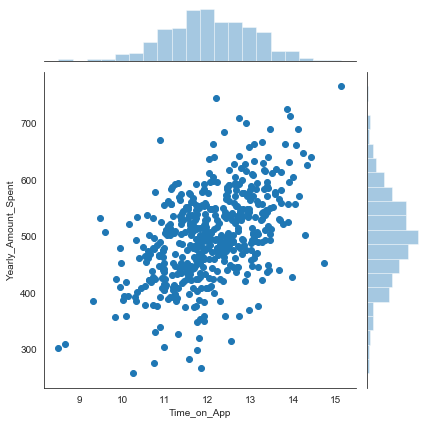

In [12]:
# jointplot between time spent on app and yearly amount spent
sns.set_style('white')
sns.jointplot('Time_on_App', 'Yearly_Amount_Spent', data=df);

**NOTE:** There is a correlation between 'Time spent on App' and 'Yearly Amount Spent' as data shows linear relationship between them.

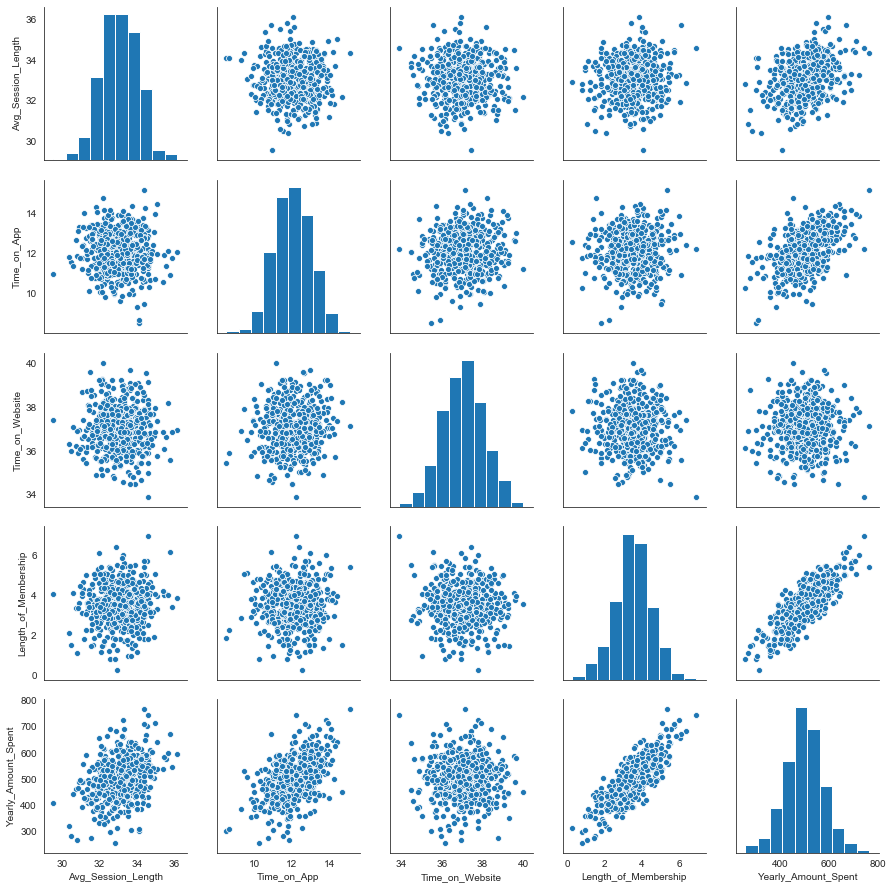

In [14]:
sns.pairplot(df);

**NOTE:** There is a strong positive relationship between 'Yearly_Amount_Spent' and 'Length_of_Membership'.

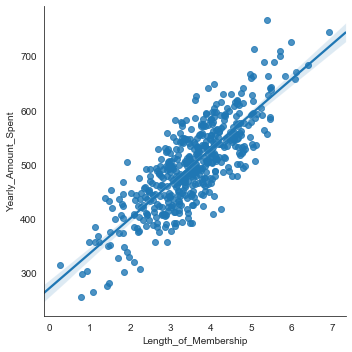

In [16]:
sns.lmplot('Length_of_Membership', 'Yearly_Amount_Spent', data=df);

**NOTE:** Data fits really well with linear plot.

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly_Amount_Spent" column. 

In [19]:
df.head(2)

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [29]:
X = df.select_dtypes(include=np.number).iloc[:, :-1]
y = df.iloc[:, -1]

In [32]:
# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=85)

**NOTE:** When `random_state` set to an integer, `train_test_split` will return same results for each execution.

## Model training and prediction

In [34]:
# fit the data into LR model
model = LinearRegression()

model.fit(X_train, y_train);

In [35]:
# model prediction
y_pred = model.predict(X_test)

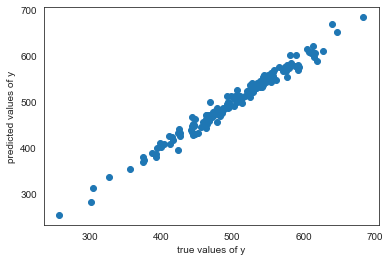

In [40]:
# scatter plot of true value and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('true values of y')
plt.ylabel('predicted values of y');

**NOTE:** Our model has done pretty good job in predicting the target values.

## Model Evaluation

In [44]:
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print(f'Root Mean Square Error: {RMSE}')

Root Mean Square Error: 10.57


## Residuals

We got a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

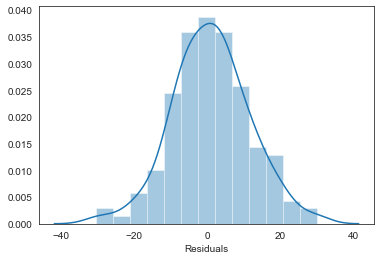

In [47]:
sns.distplot((y_test-y_pred))
plt.xlabel('Residuals');

**NOTE:** Everything looks good with the residuals as mean is 0 and distribution of residuals is normal.

## Final Interpretation

In [54]:
coefficients = pd.DataFrame(model.coef_, X.columns)
coefficients.columns = ['Coeffecient']
coefficients

,Coeffecient
Avg_Session_Length,26.081632
Time_on_App,39.187788
Time_on_Website,0.404600
Length_of_Membership,61.417778


**Interpreting the coeffecients**

* For a unit increase in `Avg_Session_Length`, there is a increase of 26.08 dollars in `Yearly_Amount_Spent`
* For a unit increase in `Time_on_App`, there is a increase of 39.18 dollars in `Yearly_Amount_Spent`
* For a unit increase in `Time_on_Website`, there is a increase of 0.40 dollars in `Yearly_Amount_Spent`
* For a unit increase in `Length_of_Membership`, there is a increase of 61.42 dollars in `Yearly_Amount_Spent`

Here, the area of focus is to find out whether the company should put their all efforts on mobile app or website to increase the ultimate sales.

Clearly, we can see that the app leads to more revenue generation when compared to website. So, the company should proceed with mobile app and invest in it. Whether the company should shutdown the website depends solely on management.